In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Data Simulation

In [2]:
x1 = np.sin(np.array(list(range(100)))* 2* np.pi / 100)
x2 = np.cos(np.array(list(range(100)))* 2* np.pi / 100)
x3 = x1 + 0.05 * np.random.randn(100)
x4 = x2 + 0.1 * np.random.randn(100)
y = 2 * x1 + 0.5 *x2 + 0.7*x3 + 0.3 * x4  + 0.8 * np.random.randn(100)
df = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4,'y':y})

# Scatter plot

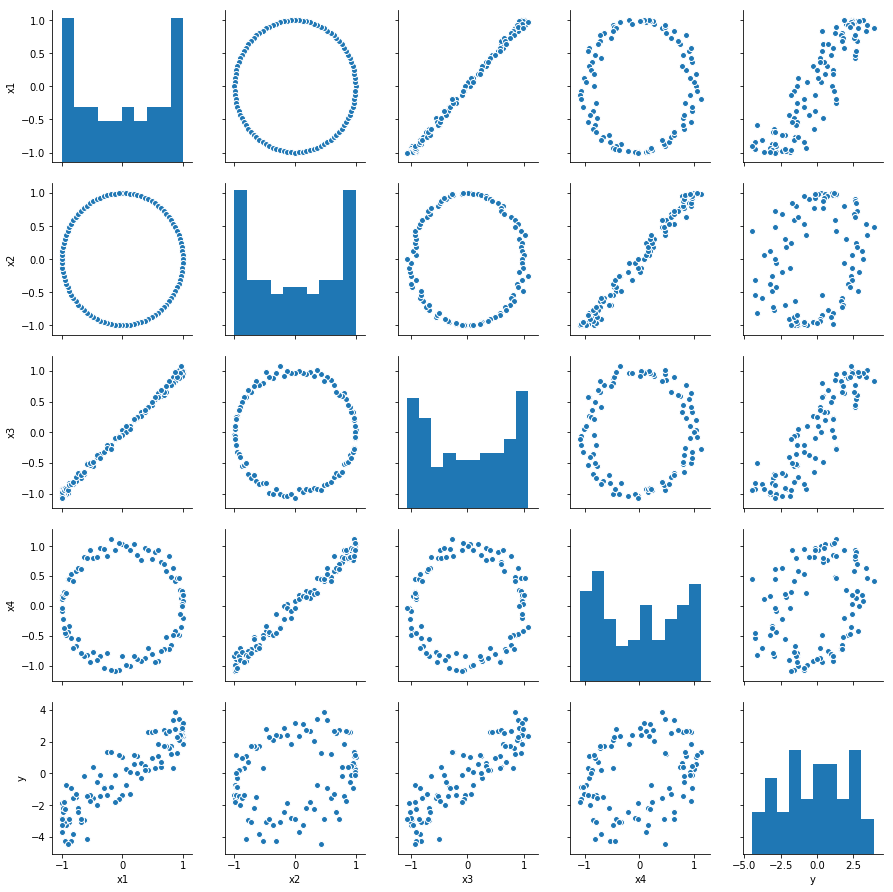

In [3]:
sns.pairplot(df)

# Pairwise correlations

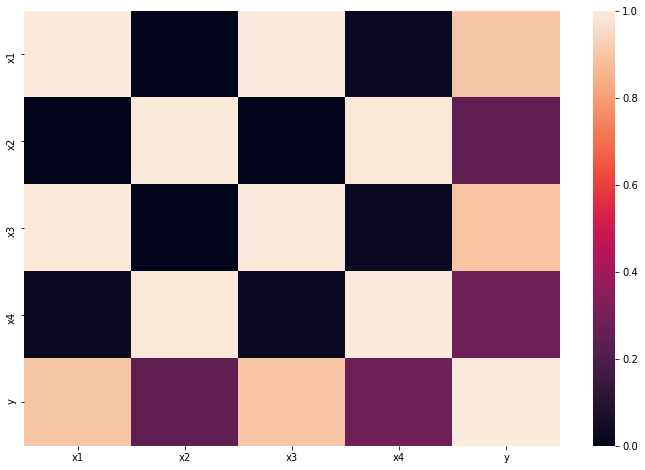

In [4]:
plt.figure(figsize = (12,8))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

pd.options.display.float_format = '{:20,.2f}'.format


# Fit OLS regression

In [5]:
mdl = smf.OLS(df.y,df.drop('y', axis = 1)).fit()

In [6]:
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           1.20e-41
Time:                        11:35:59   Log-Likelihood:                -117.44
No. Observations:                 100   AIC:                             242.9
Df Residuals:                      96   BIC:                             253.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9555      1.808      2.188      0.0

# PCA

In [7]:
pca = PCA()
pca.fit(df.drop('y',axis = 1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<Container object of 4 artists>

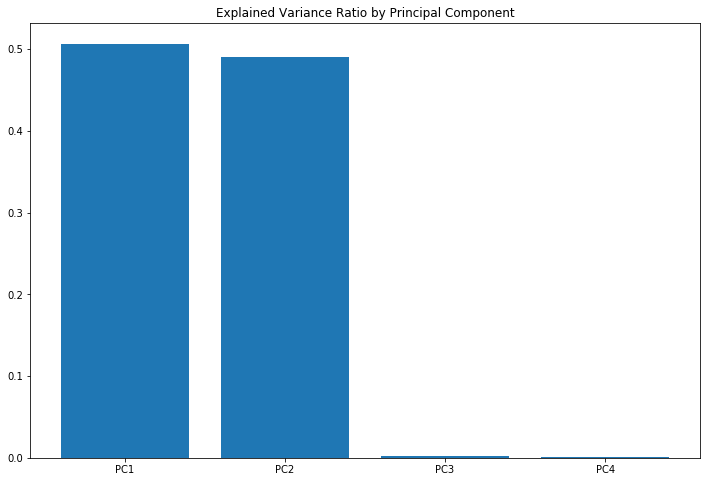

In [8]:
plt.figure(figsize = (12,8))
plt.title("Explained Variance Ratio by Principal Component")
plt.bar(['PC1','PC2','PC3','PC4'],pca.explained_variance_ratio_)

In [9]:
X = pca.transform(df.drop('y',axis = 1))[:,:2]

# OLS Regression On Principal Components

In [10]:
mdl = smf.OLS(df.y,X).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     318.1
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           1.40e-43
Time:                        11:36:01   Log-Likelihood:                -118.81
No. Observations:                 100   AIC:                             241.6
Df Residuals:                      98   BIC:                             246.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9308      0.080     24.188      0.0

# VIF Feature  Selection and Regression

In [20]:
X = np.array(df.drop('y', axis  = 1))

In [21]:
vif = pd.DataFrame([variance_inflation_factor(X,i) for i in range(4)], index = ['x1','x2','x3','x4'], columns = ['WIF'])
vif

,WIF
x1,255.83
x2,59.22
x3,256.19
x4,59.27


In [22]:
X = np.array(df.drop(['y','x3'], axis  = 1))
vif = pd.DataFrame([variance_inflation_factor(X,i) for i in range(3)], index = ['x1','x2','x4'], columns = ['WIF'])
vif

,WIF
x1,1.05
x2,59.02
x4,59.07


In [23]:
X = np.array(df.drop(['y','x3','x4'], axis  = 1))
vif = pd.DataFrame([variance_inflation_factor(X,i) for i in range(2)], index = ['x1','x2'], columns = ["VIF"])
vif

,VIF
x1,1.00
x2,1.00


In [22]:
mdl = smf.OLS(df.y,X[:,:2]).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     316.8
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           1.66e-43
Time:                        10:41:48   Log-Likelihood:                -113.21
No. Observations:                 100   AIC:                             230.4
Df Residuals:                      98   BIC:                             235.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5818      0.107     24.076      0.0

# Ridge Regression

In [24]:
X = np.array(df.drop('y', axis  = 1))

In [71]:
lambdas = np.linspace(0.01,10, 40)
ridge = RidgeCV(alphas = lambdas, cv = None)
ridge.fit(X,df.y)
alpha = ridge.alpha_

In [69]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error,False)

In [66]:
train_scores, valid_scores = validation_curve(Ridge(), X, df.y, "alpha", np.linspace(0.01,10, 40), scoring = scorer)

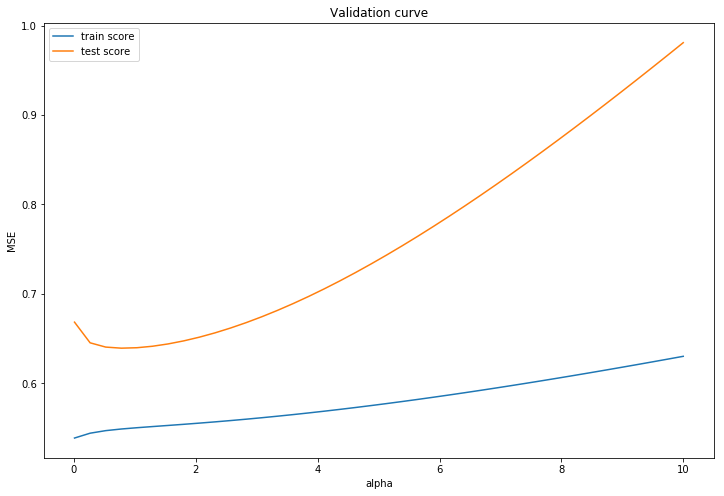

In [70]:
plt.figure(figsize = (12,8))
plt.title('Validation curve')
plt.ylabel('MSE')
plt.xlabel('alpha')
plt.plot(np.linspace(0.01,10, 40),(-1) * np.mean(train_scores,axis = 1))
plt.plot(np.linspace(0.01,10, 40),(-1) * np.mean(valid_scores,axis = 1))
plt.legend(['train score','test score'])
plt.show()

In [59]:
ridge.alpha_

1.546923076923077

In [75]:
pd.DataFrame(ridge.coef_, index = ['x1','x2','x3','x4'], columns = ['coefficient'])

,coefficient
x1,1.33
x2,0.27
x3,1.19
x4,0.50
